# HAPI - Data structures

- https://hapi-server.org/
- https://github.com/heliophysicsPy/summer-school-24/tree/main/hapi-tutorial

In [ ]:
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg']

import warnings; warnings.simplefilter('ignore')

## Data Model

A request for data using

```python
data, meta = hapi(server, dataset, parameters, start, stop)
```

returns the [Structured array (NumPy `ndarray` with named fields)](https://numpy.org/doc/stable/user/basics.rec.html) `data` and a Python dictionary `meta` by making requests to a HAPI-compliant data server `server`. The structure of `meta` mirrors the structure of the JSON metadata response from a HAPI server.

Internally, `hapi()` makes a request to a HAPI server, which returns a CSV stream in which the first column is a timestamp, and subsequent columns are data measured or associated with that timestamp. The columns are mapped to one or more parameters (that may be multi-dimensional arrays) using the metadata associated with the request for CSV data. Note that `hapi()` requests a much faster HAPI Binary stream from a server if possible. For more information on the HAPI server specification, see https://github.com/hapi-server/data-specification. 

## Extracting Data

In [ ]:
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data,meta = hapi(server,dataset,parameters,start,stop,**opts)

`data` is a NumPy `ndarray` with named fields of `Time`, `scalar`, and `vector`. The array has 10 elements (one for each time value) and each element is a list.

In [ ]:
data

array([(b'1970-01-01T00:00:00.000Z', 0.        , [ 0.        , -0.70710678, -1.        ]),
       (b'1970-01-01T00:00:01.000Z', 0.00523596, [ 0.00523596, -0.7033947 , -0.99998629]),
       (b'1970-01-01T00:00:02.000Z', 0.01047178, [ 0.01047178, -0.69966334, -0.99994517]),
       (b'1970-01-01T00:00:03.000Z', 0.01570732, [ 0.01570732, -0.6959128 , -0.99987663]),
       (b'1970-01-01T00:00:04.000Z', 0.02094242, [ 0.02094242, -0.69214317, -0.99978068]),
       (b'1970-01-01T00:00:05.000Z', 0.02617695, [ 0.02617695, -0.68835458, -0.99965732]),
       (b'1970-01-01T00:00:06.000Z', 0.03141076, [ 0.03141076, -0.68454711, -0.99950656]),
       (b'1970-01-01T00:00:07.000Z', 0.03664371, [ 0.03664371, -0.68072087, -0.99932839]),
       (b'1970-01-01T00:00:08.000Z', 0.04187565, [ 0.04187565, -0.67687597, -0.99912283]),
       (b'1970-01-01T00:00:09.000Z', 0.04710645, [ 0.04710645, -0.67301251, -0.99888987])],
      dtype=[('Time', 'S24'), ('scalar', '<f8'), ('vector', '<f8', (3,))])

Access all values for parameter `Time`

In [ ]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

In [ ]:
type(data['Time'][0])

numpy.bytes_

Convert elements of `data['Time']` to Python `datetime` objects

In [ ]:
from hapiclient import hapitime2datetime
dateTimes = hapitime2datetime(data['Time'])
dateTimes

array([datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 1, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 2, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 3, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 4, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 5, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 6, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 7, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 8, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 9, tzinfo=<UTC>)], dtype=object)

In [ ]:
# Create a custom formatted time string
# See https://docs.python.org/3/library/datetime.html for more on datetime object manipulation
print(dateTimes[0].strftime('%Y-%j at %H hours, %M minues, %S seconds, and %f microseconds'))

1970-001 at 00 hours, 00 minues, 00 seconds, and 000000 microseconds


Convert elements in `data['Time']` to Unicode strings 

In [ ]:
# Convert from Python bytes to UTF-8 (regular Python 3 strings)
TimeStamps = data['Time'].astype('U')
TimeStamps

array(['1970-01-01T00:00:00.000Z', '1970-01-01T00:00:01.000Z',
       '1970-01-01T00:00:02.000Z', '1970-01-01T00:00:03.000Z',
       '1970-01-01T00:00:04.000Z', '1970-01-01T00:00:05.000Z',
       '1970-01-01T00:00:06.000Z', '1970-01-01T00:00:07.000Z',
       '1970-01-01T00:00:08.000Z', '1970-01-01T00:00:09.000Z'],
      dtype='<U24')

In [ ]:
type(TimeStamps[0])

numpy.str_

Access all values for parameter `vector`

In [ ]:
data['vector']

array([[ 0.        , -0.70710678, -1.        ],
       [ 0.00523596, -0.7033947 , -0.99998629],
       [ 0.01047178, -0.69966334, -0.99994517],
       [ 0.01570732, -0.6959128 , -0.99987663],
       [ 0.02094242, -0.69214317, -0.99978068],
       [ 0.02617695, -0.68835458, -0.99965732],
       [ 0.03141076, -0.68454711, -0.99950656],
       [ 0.03664371, -0.68072087, -0.99932839],
       [ 0.04187565, -0.67687597, -0.99912283],
       [ 0.04710645, -0.67301251, -0.99888987]])

Access all parameters at second timestamp.

In [ ]:
data[1]

(b'1970-01-01T00:00:01.000Z', 0.00523596, [ 0.00523596, -0.7033947 , -0.99998629])

Access value of `vector` at second timestep.

In [ ]:
data['vector'][1]

array([ 0.00523596, -0.7033947 , -0.99998629])

Access value of second component of `vector` at second timestep

In [ ]:
data['vector'][1,1]

-0.7033947028105039

## Example 1

The following script has code for getting and plotting data from the ACE satellite.

- [Advanced Composition Explorer (ACE)](https://izw1.caltech.edu/ACE/)
- [AC_K0_EPM](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_K0_EPM): K0 - ACE EPAM 5-Minute Key Parameters - R. Gold (JHU Applied Physics Laboratory)
    - Proton Flux (0.48-0.97 MeV) [H_lo]: 0.48-0.97 MeV (5 min)
    - Electron Flux (38-53 keV) [Electron_lo]: 38-53 keV Electron Flux (5 min)
    - Electron Flux (175-315 keV) [Electron_hi]: 175-315 keV Electron Flux (5 min)

[('Time', 'S24'), ('H_lo', '<f8'), ('Electron_lo', '<f8'), ('Electron_hi', '<f8')]
first timestamp (b'2021-10-25T00:00:00.000Z', 0.82300001, 1226.18994141, 29.54899979)
last  timestamp (b'2021-11-30T23:55:00.000Z', 0.89899999, 1160.05297852, 35.00600052)


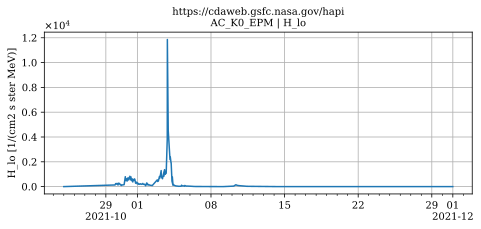

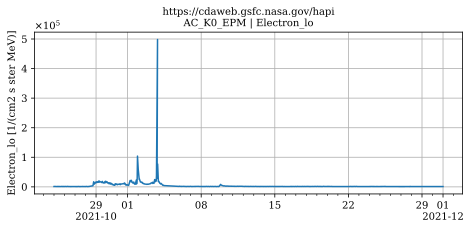

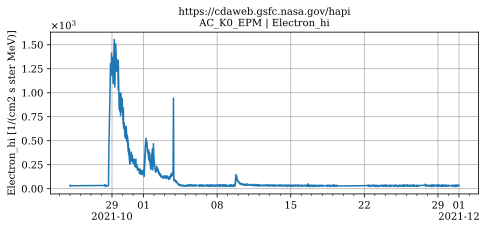

In [ ]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

# ACE Electron, Proton, and Alpha Monitor
# https://cdaweb.gsfc.nasa.gov/registry/hdp/hapi/hapiHtml.html#url=https://cdaweb.gsfc.nasa.gov/hapi&id=AC_K0_EPM
dataset    = 'AC_K0_EPM'
parameters = 'H_lo,Electron_lo,Electron_hi'
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

print(data.dtype)
print("first timestamp", data[0])
print("last  timestamp", data[-1])

hapiplot(data, meta);

## Example 2

Starting with the following script, find the average radial distance of the moon on the first 9 days of January of 2022. (To avoid 100+ users requesting data from the same data server, do not modify <code>start</code> and <code>stop</code>; the data required to solve this problem is locally cached and <code>hapi()</code> will use this cached data by default.)

- [Moon ephemeris](https://hapi-server.org/servers/SSCWeb/hapi/info?id=moon)
- X_GEO [Unit: R_E]: X Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG 
- Y_GEO [Unit: R_E]: Y Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG 
- Z_GEO [Unit: R_E]: Z Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG 
- Radius [Unit: R_E]: Distance spacecraft is from Earth for each given point in time

In [ ]:
from hapiclient import hapi

server     = 'https://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'moon'
parameters = 'X_GEO,Y_GEO,Z_GEO,Radius'
# Do not modify start/stop. See note above.
# HAPI stop dates/times are inclusive, so first returned timestamp could be on start.
start      = '2022-01-01T00:00:00.000Z'
# HAPI stop dates/times are exclusive, so last returned timestamp will be before stop.
stop       = '2022-01-10T00:00:00.000Z' 
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

In [ ]:
data

array([(b'2022-001T00:00:00Z', -46.01434086,  22.98569918, -22.8146622 , 56.26873682),
       (b'2022-001T00:01:00Z', -45.91699812,  23.17733133, -22.81642507, 56.26854056),
       (b'2022-001T00:02:00Z', -45.81885956,  23.36855041, -22.81819241, 56.26834763),
       ...,
       (b'2022-009T23:57:00Z',   3.42931696, -61.61136703,   6.23451262, 62.02088285),
       (b'2022-009T23:58:00Z',   3.16807861, -61.62545278,   6.23857662, 62.02139139),
       (b'2022-009T23:59:00Z',   2.90678052, -61.63843764,   6.242641  , 62.02190689)],
      dtype=[('Time', 'S18'), ('X_GEO', '<f8'), ('Y_GEO', '<f8'), ('Z_GEO', '<f8'), ('Radius', '<f8')])

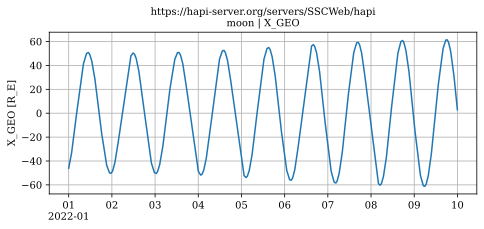

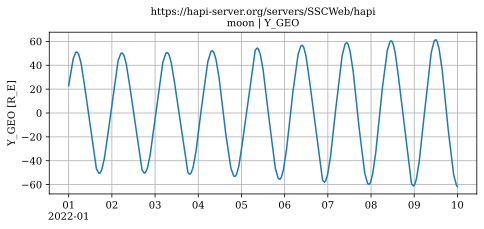

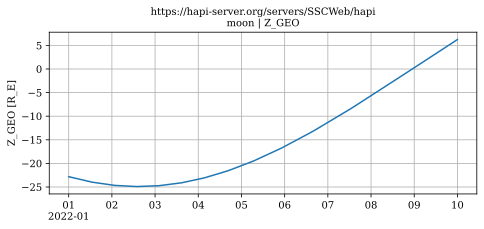

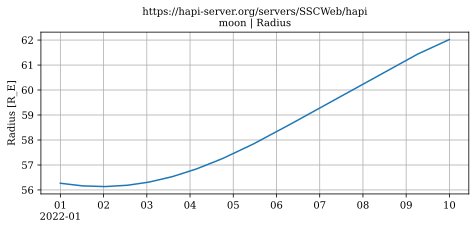

In [ ]:
hapiplot(data, meta);

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.sqrt(data['X_GEO']**2 + data['Y_GEO']**2 + data['Z_GEO']**2)

array([56.26873682, 56.26854056, 56.26834763, ..., 62.02088285,
       62.02139139, 62.02190689])

In [ ]:
data['Radius']

array([56.26873682, 56.26854056, 56.26834763, ..., 62.02088285,
       62.02139139, 62.02190689])

Mean Radial Distance = 58.31 R_E


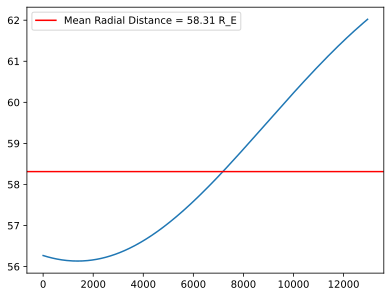

In [ ]:
mean_radius = np.mean(data['Radius'])
print(f'Mean Radial Distance = {mean_radius:.2f} R_E')

plt.plot(data['Radius'])
plt.axhline(mean_radius, color='red', label=f'Mean Radial Distance = {mean_radius:.2f} R_E')
plt.legend()
plt.show()

## Convert to Pandas DataFrame

Conversion of a NumPy `ndarray` to a Pandas DataFrame can be made using [the `pandas.DataFrame` function.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [ ]:
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server,dataset,parameters,start,stop, **opts)

import pandas

# Put each parameter into a DataFrame
df_Time   = pandas.DataFrame(hapitime2datetime(data['Time']))
df_scalar = pandas.DataFrame(data['scalar'])
df_vector = pandas.DataFrame(data['vector'])

# Create DataFrame to hold all parameters
df = pandas.DataFrame()

# Place parameter DataFrames into single DataFrame
df = pandas.concat([df_Time, df_scalar, df_vector], axis=1)

# Name columns (more generally, one would want to obtain the column labels from information in the meta dict)
df.columns = ['Time', 'scalar','vector_x', 'vector_y', 'vector_z']

# Set Time to be index
df.set_index('Time', inplace=True)

df

,scalar,vector_x,vector_y,vector_z
Time,,,,
1970-01-01 00:00:00+00:00,0.000000,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,0.041876,-0.676876,-0.999123


In [ ]:
df.describe()

,scalar,vector_x,vector_y,vector_z
count,10.000000,10.000000,10.000000,10.000000
mean,0.023557,0.023557,-0.690173,-0.999609
std,0.015847,0.015847,0.011470,0.000388
min,0.000000,0.000000,-0.707107,-1.000000
25%,0.011781,0.011781,-0.698726,-0.999928
50%,0.023560,0.023560,-0.690249,-0.999719
75%,0.035335,0.035335,-0.681677,-0.999373
max,0.047106,0.047106,-0.673013,-0.998890


In [ ]:
df[df['scalar'] == df['scalar'].max()]

,scalar,vector_x,vector_y,vector_z
Time,,,,
1970-01-01 00:00:09+00:00,0.047106,0.047106,-0.673013,-0.99889


In [ ]:
print("Means")
print(df.mean())
print("\nStandard Deviations")
print(df.std())

print(f"\nMax value of scalar: {df['scalar'].max()} at time {df['scalar'].idxmax()}")

Means
scalar      0.023557
vector_x    0.023557
vector_y   -0.690173
vector_z   -0.999609
dtype: float64

Standard Deviations
scalar      0.015847
vector_x    0.015847
vector_y    0.011470
vector_z    0.000388
dtype: float64

Max value of scalar: 0.04710645070964266 at time 1970-01-01 00:00:09+00:00


## Convert to NDCube

HAPI's data arrays can be converted to [SunPy NDCubes](https://docs.sunpy.org/projects/ndcube/en/stable/introduction.html) using [the `ndcube.NDCube` function](https://docs.sunpy.org/projects/ndcube/en/stable/api/ndcube.NDCube.html#ndcube.NDCube).

We also set a WCS array, and create appropriate timestamps.

In [ ]:
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

dateTimes = hapitime2datetime(data['Time'])

import astropy.wcs

my_wcs = astropy.wcs.WCS({"CTYPE1": "TIME", 
                          "CUNIT1": "s", 
                          "CDELT1": 1, 
                          "CRPIX1": 0, 
                          "CRVAL1": 0, 
                          "NAXIS1": 10})

import ndcube
cube = ndcube.NDCube(data['scalar'], my_wcs)

from astropy.time import Time
t = Time(dateTimes)
cube.extra_coords.add('time', 0, t)

print(cube)

NDCube
------
Dimensions: [10.] pix
Physical Types of Axes: [('time', 'time')]
Unit: None
Data Type: float64


# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.  Earlier we showed the metadata for a dataset; now we look at (a) creating a list of all HAPI servers and (b) asking any specific HAPI server which datasets it has available.

## Listing all Servers

HAPI has a query function to return all current HAPI servers, which is identical to the 
[Equivalent URL](https://github.com/hapi-server/data-specification/blob/master/servers.txt).

In [ ]:
from hapiclient import hapi

servers = hapi() # servers is an array of URLs
display(servers)

['http://hapi-server.org/servers/SSCWeb/hapi',
 'https://cdaweb.gsfc.nasa.gov/hapi',
 'https://imag-data.bgs.ac.uk/GIN_V1/hapi',
 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi',
 'http://lasp.colorado.edu/lisird/hapi',
 'http://hapi-server.org/servers/TestData2.0/hapi',
 'https://amda.irap.omp.eu/service/hapi',
 'https://vires.services/hapi',
 'https://api.helioviewer.org/hapi/Helioviewer/hapi',
 'https://csatools.esac.esa.int/HapiServer/hapi',
 'https://hapi.spaceweather.knmi.nl/hapi',
 'https://planet.physics.uiowa.edu/das/das2Server/hapi']

## Listing all Datasets from a Server

For a given server - in this example, CDAWeb - you can fetch the full list of dataset ids it serves. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/catalog](https://cdaweb.gsfc.nasa.gov/hapi/catalog).

In [ ]:
from hapiclient import hapi

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

# Display first 5 entries
display(meta['catalog'][0:5])

[{'id': 'A1_K0_MPA'},
 {'id': 'A2_K0_MPA'},
 {'id': 'AC_AT_DEF'},
 {'id': 'AC_H0_MFI'},
 {'id': 'AC_H0_SWE'}]

## Listing all Parameters in a Dataset

Each dataset's metadata is available from a query, without needing to fetch the actual data. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI).

In [ ]:
from hapiclient import hapi

server  = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'AC_H0_MFI'
meta = hapi(server, dataset)
display(meta)

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H0_MFI',
 'contact': 'N. Ness @ Bartol Research Institute',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'Magnitude',
   'description': 'B-field magnitude',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'size': [3],
   'name': 'BGSEc',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'size': [3],
   'name': 'BGSM',
   'description': 'Magnetic field vector in GSM coordinates (16 sec)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'name': 'dBrms',
   'description': 'RMS of Magnetic Field (16 sec period)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'size': [3],
   'name': 'SC_pos_GSE',
   'description': 'ACE s/c position, 3 comp. in GSE coord.',
   'units': 'km',
   'type': 'doub

## Listing Parameter Metadata

One can request a subset of metadata for dataset (rather than all parameters as in the last example) by adding `parameters` to the call. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc).

(Note that HAPI allows non-standard server-specific keys in `meta`, which are prefixed by `x_`.  This is similar to the Python convention where variables and methods prefixed with an underscore indicate that they are for internal use only and may change.)

Here we fetch metadata for the `Magnitude` and `BGSEc` parameters in the `AC_H0_MFI` dataset from `CDAWeb`.

In [ ]:
from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H0_MFI',
 'contact': 'N. Ness @ Bartol Research Institute',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'Magnitude',
   'description': 'B-field magnitude',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'size': [3],
   'name': 'BGSEc',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'}],
 'startDate': '1997-09-02T00:00:12Z',
 'stopDate': '2024-09-28T23:59:55Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H0_MFI'}

## Generating Data

For testing, it may be useful to create a simulated HAPI data respsonse in Python. A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.
1970-01-01T00:00:02.000Z, 4.,5.,6.
```

where the metadata indicates there is one parameter named `vector` with `size=[3]` and `type=double` could be created by

In [ ]:
import numpy as np
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

# Populate: method 1
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

display(data)

# Populate: method 2
data[0] = (b'1970-01-01T00:00:00.000Z', [1.0,2.0,3.0])
data[1] = (b'1970-01-01T00:00:01.000Z', [4.0,5.0,6.0])

display(data)

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 11.,12.,13.,14.,15.,16.,17.,18.,19.
```
where the metadata indicates there is one parameter named `matrix` with `size=[3,3]` and `type=double` could be created by

In [ ]:
import numpy as np

# Allocate
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('matrix', '<f8', (3,3,))])

# Populate
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

array([(b'1970-01-01T00:00:00.000Z', [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('matrix', '<f8', (3, 3))])

Multiple parameters, e.g. a response with both the vector and matrix parameters considered above

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,  1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 4.,5.,6., 11.,12.,13.,14.,15.,16.,17.,18.,19.
```

can be created by populating

In [ ]:
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3,3,))])
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.], [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.], [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3, 3))])